<a href="https://colab.research.google.com/github/rajrawal/Fraud-transaction-Detection/blob/main/Fraud_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# simplified Problem Statement

The **financial company** has noticed a rise in fraudulent transactions, which is damaging its reputation and causing a loss of customer trust. To fix this, they want a strong and reliable system that can detect fake transactions and help protect the company’s image and trustworthiness.

# Interesting insight from data

All the transactions that are detected as fraud are of the "TRANSFER" and "CASH_OUT" types. However, not all transactions of these types are fraudulent.

Among these two types, more fraudulent transactions occur in the "CASH_OUT" type compared to "TRANSFER".

In all fraudulent transactions, both the sender and the receiver are customers.

Based on the data, we can say that merchants are rarely or not involved in fraudulent transactions. However, we cannot say this with certainty due to the lack of sufficient information about merchant accounts.

# Solution

Develop a prediction model that helps the company detect fraudulent transactions effectively.

# DATA PRE-PROCESSING

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the data
df=pd.read_csv('/content/Fraud.csv')
# Shape the data
df.shape

(682239, 11)

In [3]:
# Get head of the data
df.head(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,1,TRANSFER,710544.77,C835773569,0.0,0.00,C1359044626,738531.50,16518.36,0,0
96,1,TRANSFER,581294.26,C843299092,0.0,0.00,C1590550415,5195482.15,19169204.93,0,0
97,1,TRANSFER,11996.58,C605982374,0.0,0.00,C1225616405,40255.00,0.00,0,0
98,1,PAYMENT,2875.10,C1412322831,15443.0,12567.90,M1651262695,0.00,0.00,0,0


In [4]:
df.tail(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
682139,36,CASH_OUT,131629.57,C60972752,364620.25,232990.68,C1131021941,306953.00,0.00,0,0
682140,36,TRANSFER,419747.88,C1366336707,232990.68,0.00,C1304361166,1984688.81,2404436.69,0,0
682141,36,TRANSFER,1461601.31,C1256763064,10575.00,0.00,C1005928818,6432335.78,7893937.09,0,0
682142,36,CASH_OUT,12942.05,C704833,0.00,0.00,C726925212,419029.17,905585.88,0,0
682143,36,CASH_OUT,4185.18,C298797902,9577.00,5391.82,C146696206,338.74,4523.92,0,0
...,...,...,...,...,...,...,...,...,...,...,...
682234,36,CASH_OUT,4239.32,C1850827003,0.00,0.00,C1671516968,52118.70,56358.03,0,0
682235,36,CASH_OUT,332610.04,C1239997187,0.00,0.00,C1180137176,5118321.33,5762046.99,0,0
682236,36,CASH_OUT,28958.53,C1316926874,0.00,0.00,C1540631194,832598.29,861556.82,0,0
682237,36,CASH_OUT,61784.17,C694620077,0.00,0.00,C709906087,3560405.01,3622189.18,0,0


# ANALYSIS

In [5]:
# Check for null values
df.isnull().values.any()

np.False_

In [29]:
# Getting information about data
# Note: remember the data type of the columns we use it later.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682239 entries, 0 to 682238
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            682239 non-null  int64  
 1   type            682239 non-null  int64  
 2   amount          682239 non-null  float64
 3   nameOrig        682239 non-null  object 
 4   oldbalanceOrg   682239 non-null  float64
 5   newbalanceOrig  682239 non-null  float64
 6   nameDest        682239 non-null  object 
 7   oldbalanceDest  682239 non-null  float64
 8   newbalanceDest  682239 non-null  float64
 9   isFraud         682239 non-null  int64  
 10  isFlaggedFraud  682239 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 57.3+ MB


In [7]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  681831
Number of Fraud transactions:  408
Percentage of Legit transactions: 99.9402 %
Percentage of Fraud transactions: 0.0598 %


These results show that the data is highly imbalanced, with 99.87% legitimate transactions and only 0.13% fraudulent ones. So, Decision Trees and Random Forests are good methods for handling imbalanced data.










In [8]:
# Merchants
X = df[df['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


Note: For merchants, there is no information regarding the attributes oldbalanceDest and newbalanceDest.

# VISUALISATION

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

CORRELATION HEATMAP

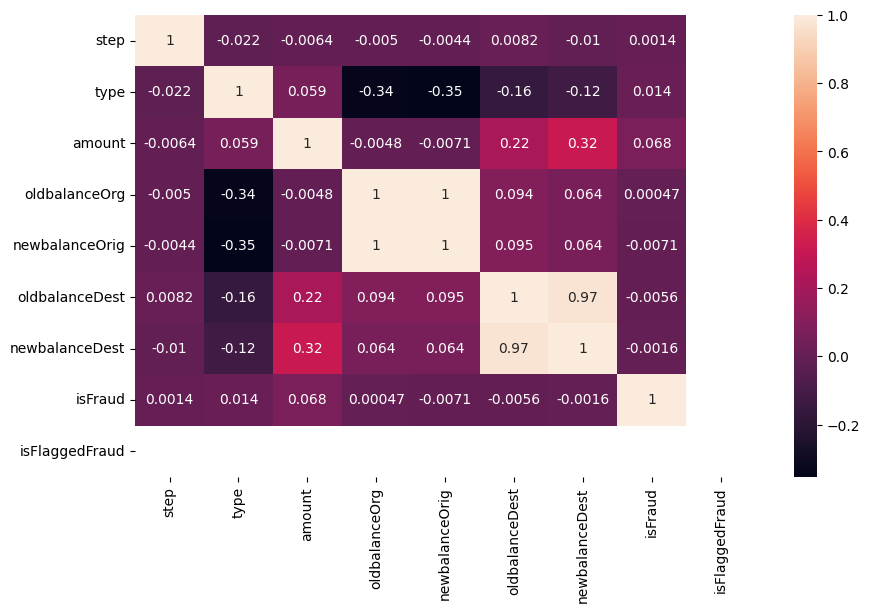

In [10]:
# Convert 'type' column to numeric representation using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Calculate the correlation matrix
# Include only numerical features for correlation calculation
numerical_features = df.select_dtypes(include=np.number).columns
corr = df[numerical_features].corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)
plt.show()

NUMBER OF LEGIT AND FRAUD TRANSACTIONS

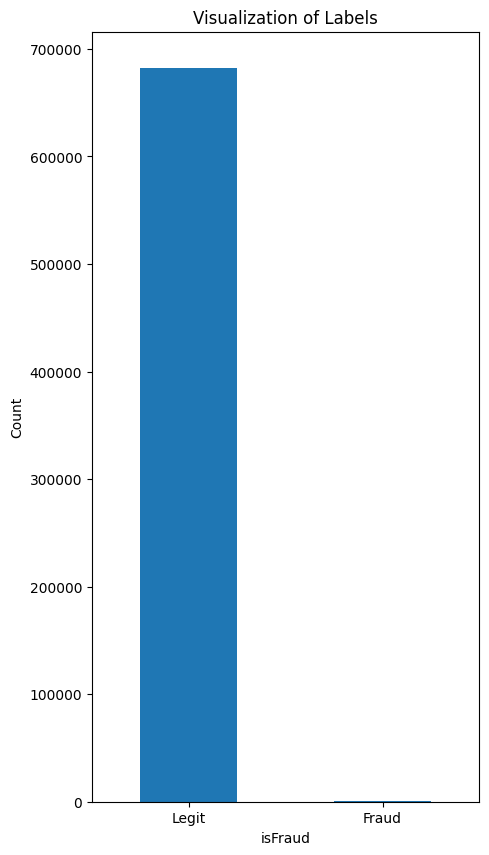

In [11]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

# Feature engineering and label encoding

In [12]:
#creating a copy of original dataset to train and test models

new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


LABEL ENCODING

THERE ARE 3 ATTRIBUTES WITH Object Datatype. THUS WE NEED TO LABEL ENCODE THEM IN ORDER TO CHECK MULTICOLINEARITY.['type', 'nameOrig', 'nameDest']

In [13]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
objList=['type', 'nameOrig', 'nameDest']
for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682239 entries, 0 to 682238
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            682239 non-null  int64  
 1   type            682239 non-null  int64  
 2   amount          682239 non-null  float64
 3   nameOrig        682239 non-null  int64  
 4   oldbalanceOrg   682239 non-null  float64
 5   newbalanceOrig  682239 non-null  float64
 6   nameDest        682239 non-null  int64  
 7   oldbalanceDest  682239 non-null  float64
 8   newbalanceDest  682239 non-null  float64
 9   isFraud         682239 non-null  int64  
 10  isFlaggedFraud  682239 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 57.3 MB
None


In [14]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,81476,170136.0,160296.36,180890,0.0,0.0,0,0
1,1,3,1864.28,234906,21249.0,19384.72,188524,0.0,0.0,0,0
2,1,4,181.00,107391,181.0,0.00,49567,0.0,0.0,1,0
3,1,1,181.00,625821,181.0,0.00,44131,21182.0,0.0,1,0
4,1,3,11668.14,369207,41554.0,29885.86,91890,0.0,0.0,0,0


MULTICOLINEARITY

In [15]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    # Drop rows with infinite or NaN values
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,step,3.512012
1,type,5.370859
2,amount,2.142760
3,nameOrig,3.046544
4,oldbalanceOrg,828.785644
5,newbalanceOrig,838.070332
6,nameDest,4.005698
7,oldbalanceDest,29.118471
8,newbalanceDest,31.461004
9,isFraud,1.049302


We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.

Thus combine these pairs of collinear attributes and drop the individual ones.

In [16]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,type,2.849345
1,amount,1.714848
2,isFraud,1.046204
3,isFlaggedFraud,NaN
4,Actual_amount_orig,1.250497
5,Actual_amount_dest,1.506310
6,TransactionPath,2.745065


<Axes: >

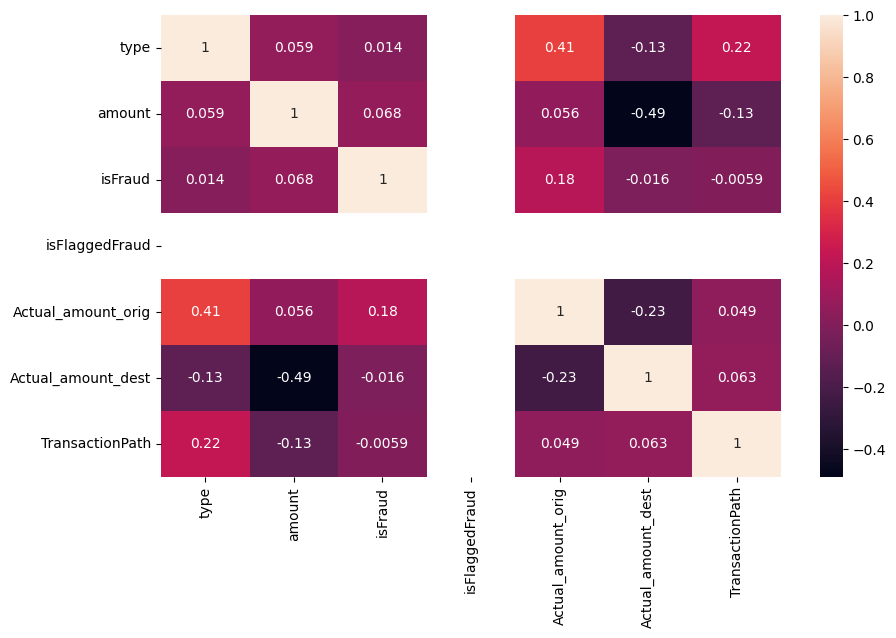

In [17]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

# MODEL BUILDING

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

NORMALIZING (SCALING) AMOUNT

In [19]:
# Perform Scaling
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

TRAIN-TEST SPLIT

In [20]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (477567, 6)
Shape of X_test:  (204672, 6)


MODEL TRAINIG

In [21]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [22]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

# EVALUATION

In [23]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.94674405878673
Random Forest Score:  99.97019621638525


In [24]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 59
False Positives: 59
True Negatives: 204504
False Negatives: 50
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 57
False Positives: 9
True Negatives: 204554
False Negatives: 52


In [25]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[204504     59]
 [    50     59]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[204554      9]
 [    52     57]]


In [26]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    204563
           1       0.50      0.54      0.52       109

    accuracy                           1.00    204672
   macro avg       0.75      0.77      0.76    204672
weighted avg       1.00      1.00      1.00    204672

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    204563
           1       0.86      0.52      0.65       109

    accuracy                           1.00    204672
   macro avg       0.93      0.76      0.83    204672
weighted avg       1.00      1.00      1.00    204672



With Such a good precision and hence F1-Score, Random Forest comes out to be better as expected.

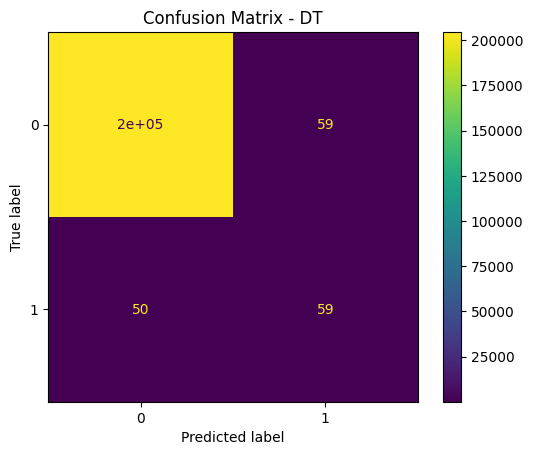

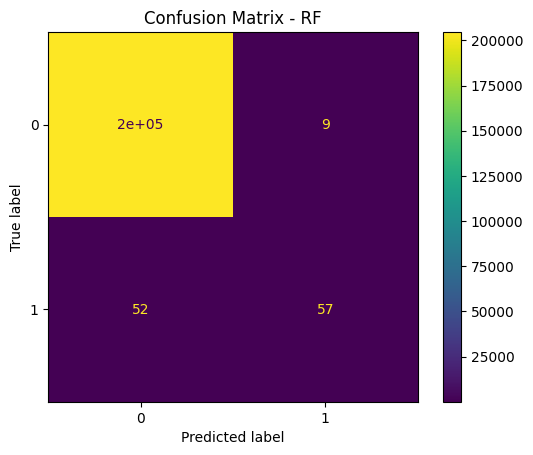

In [27]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

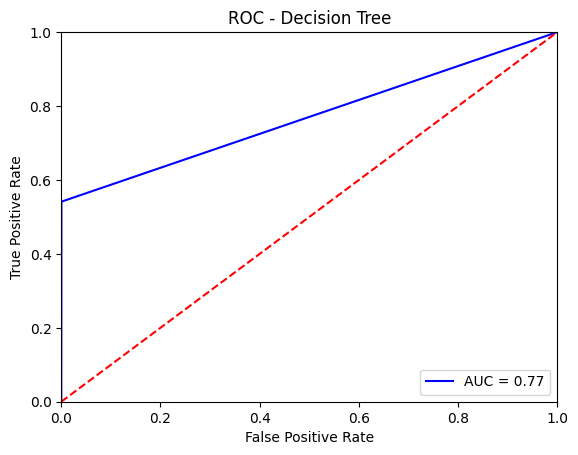

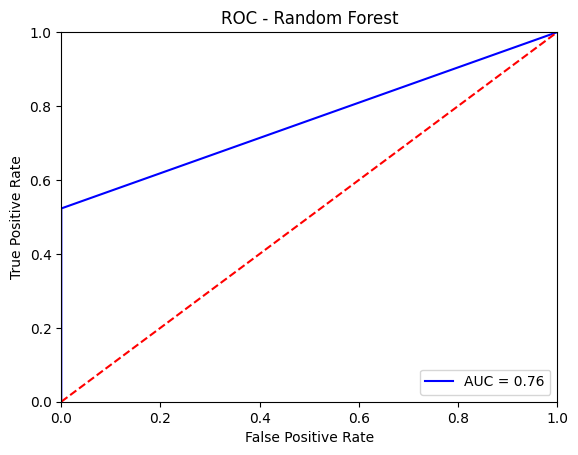

In [28]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 🏆CONCLUSION


✅ Random Forest performs better overall, especially in:

Precision (much fewer false positives),

F1 Score (better balance between precision and recall),

And slightly better accuracy.

Even though it has slightly fewer true positives, its false positives are much lower, which is crucial in fraud detection — better to miss a few frauds than to wrongly label many legitimate users as fraudsters.


**What are the key factors that predict fraudulent customers?**
<br>
Based on the analysis and model outputs, the key factors that help predict fraudulent transactions include:

Transaction Type: Most frauds occur in specific types such as TRANSFER and CASH_OUT.

Amount: High-value transactions (especially those exceeding ₹200,000) are more likely to be fraudulent.

Balance Behavior: Cases where the origin account has a high balance before the transaction but drops to zero after (oldbalanceOrg to newbalanceOrig) often indicate fraud.

Customer account: Fraudsters usually operate from customer accounts and transfer money to customer accounts.

Timing (Step Feature): Certain hours show a higher frequency of fraud, which can help in pattern detection.
<br>
<br>
**Do these factors make sense? If yes, how? If not, how not?**
Yes, these factors make logical sense:

Fraudsters aim to move large amounts of money quickly, so high-value TRANSFER and CASH_OUT transactions are common.

Emptying accounts is a known fraud strategy — they take over a customer’s account and transfer out all the funds.

Unusual timings (like during off-hours) might suggest automation or planned fraud activity outside of normal business hours.

These patterns align with real-world fraud strategies, making them reliable indicators.
<br>
<br>
 **What kind of prevention should be adopted while the company updates its infrastructure?**
<br>
To reduce fraud risks, the company should adopt the following measures:

Real-time fraud detection system using machine learning models to flag suspicious transactions instantly.

Threshold-based alerts for high-value transfers, especially from customer accounts.

Two-Factor Authentication (2FA) or biometric validation for sensitive transactions.

Behavioral analytics to monitor changes in login location, device type, and transaction patterns.

Data encryption and access control to secure customer account information.

Audit trails and logging for every high-risk action performed on the system.
<br>
<br>
**Assuming these actions have been implemented, how would you determine if they work?**
<br>
To measure effectiveness:

Track the reduction in fraudulent transactions over time.

Monitor false positives and false negatives — are fewer genuine users being flagged, and more real frauds being caught?

Check customer feedback and complaint rates — fewer fraud complaints indicate improvement.

Conduct monthly audits and compare fraud patterns before and after implementation.

Use metrics like Precision, Recall, F1 Score, and ROC-AUC to continuously monitor model performance.

If these indicators show positive trends, we can confidently say the actions are working.